In [1]:
import time      # for testing use only
import os         # for testing use only

import math                      
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Crawling

In [ ]:
user_agent = {'User-agent': 'Mozilla/5.0'} #starting to crawl..

titles_arr = []
data = []

for i in range(40000,45622):
    print(i, ', ', end = '')
    try:
        url1="https://www.ad.co.il/nadlanprice?pageindex=" + str(i)    
        response1 = requests.get(url1,headers=user_agent)
        soup1 = BeautifulSoup(response1.content, "html.parser")
        table =soup1.find("table",attrs={"class":"table text-nowrap"})
    #     print(titles_arr.count())
        if(len(titles_arr) == 0):
            print('titles add')
            titles = table.find('thead').findAll("th")
            for title in titles:
                titles_arr.append(title.get_text().strip())

        HTML_data = table.find_all("tr")[1:]

        for element in HTML_data:
            sub_data = []
            for sub_element in element:
                try:
                    sub_data.append(sub_element.get_text())
                except:
    #                 print(element)
    #                 print(sub_element)
                    continue
           
            data.append(sub_data)
    except:
        print('error in item' + str(i))
        continue

# Storing the data into Pandas
# DataFrame 
dataFrame = pd.DataFrame(data = data, columns = titles_arr)
dataFrame.to_csv('Geeks6.csv')
dataFrame

# Loading CSV and convert into DataFrame

In [2]:
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df

In [3]:
df = load_csv('C:/Users/User/Downloads/Geeks0.csv')
for i in range(1,7):
    file_name = 'C:/Users/User/Downloads/Geeks' + str(i) + '.csv'
    temp = load_csv(file_name)
    df = df.append(temp)
df #loaded and added all datasets to one big dataset

,Unnamed: 0,תאריך,ישוב,רחוב,חד',שטח,קומה,מחיר,מחיר למר,בניה
0,0,28/1/2021,ירושלים,רמת מוצא 27,5.0,134.0,1.0,"3,675,000","27,425",2000.0
1,1,28/1/2021,גבעתיים,המבוא 9,2.0,72.0,3.0,"1,961,800","27,247",1960.0
2,2,28/1/2021,גבעתיים,המרי 26,2.0,72.0,NaN,"1,961,800","27,247",1960.0
3,3,28/1/2021,ירושלים,רמת מוצא 27,5.0,134.0,NaN,"3,675,000","27,425",2000.0
4,4,27/1/2021,בת ים,הרצל 39,2.0,41.0,NaN,"1,380,000","33,658",1960.0
...,...,...,...,...,...,...,...,...,...,...
272237,272237,01/1/1998,אילת,NaN,3.0,61.0,NaN,"346,528","5,680",1960.0
272238,272238,01/1/1998,ירושלים,NaN,4.0,60.0,NaN,"752,250","12,537",1972.0
272239,272239,01/1/1998,ירושלים,NaN,NaN,NaN,NaN,"1,805,165",NaN,NaN
272240,272240,01/1/1998,ירושלים,בית וגן 42,3.0,74.0,3.0,"777,920","10,512",1980.0


# Cleaning Data

In [4]:
del df['רחוב'] 
del df['Unnamed: 0'] #removing unessecary columns
df.columns = ['date', 'city', 'num_of_rooms', 'area','floor_num', 'price', 'price_square', 'year'] #to make coding easier with english names
df['floor_num'].fillna(df['floor_num'].mean(), inplace=True) #Filling missing values of the column "floor_num" with the mean
df.drop_duplicates(keep='first', inplace=False, ignore_index=False) #Cleaning dataset
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #Cleaning dataset of all missing values we dont want to complete
df.replace(',','', regex=True, inplace=True) #replacing all ',' in the dataframe so we can convert objects to integers

df['date'] =  pd.to_datetime(df['date'])
df.set_index('date')
df

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-4-0e1e79d81d8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] =  pd.to_datetime(df['date'])


,date,city,num_of_rooms,area,floor_num,price,price_square,year
0,2021-01-28,ירושלים,5.0,134.0,1.000000,3675000,27425,2000.0
1,2021-01-28,גבעתיים,2.0,72.0,3.000000,1961800,27247,1960.0
2,2021-01-28,גבעתיים,2.0,72.0,3.376548,1961800,27247,1960.0
3,2021-01-28,ירושלים,5.0,134.0,3.376548,3675000,27425,2000.0
4,2021-01-27,בת ים,2.0,41.0,3.376548,1380000,33658,1960.0
...,...,...,...,...,...,...,...,...
272235,1998-01-01,ירושלים,3.0,68.0,3.376548,547196,8047,1970.0
272236,1998-01-01,ירושלים,5.0,125.0,2.000000,1315392,10523,1991.0
272237,1998-01-01,אילת,3.0,61.0,3.376548,346528,5680,1960.0
272238,1998-01-01,ירושלים,4.0,60.0,3.376548,752250,12537,1972.0


In [5]:
lst_cols = ['num_of_rooms', 'area', 'price','floor_num' ,'price_square', 'year']
for item in lst_cols: #converting all needed columns to int
    df[item] = df[item].astype(int)
pd.set_option('display.float_format', lambda x: '%.5f' % x) #to use describe function 
df.describe()

<ipython-input-5-6e4503f27d45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[item] = df[item].astype(int)


,num_of_rooms,area,floor_num,price,price_square,year
count,1833109.00000,1833109.00000,1833109.00000,1833109.00000,1833109.00000,1833109.00000
mean,3.75023,95.55143,3.20817,1041192.80946,11146.11517,1986.89274
std,1.14229,45.31991,2.37753,931455.89578,8181.98205,24.77741
min,1.00000,1.00000,1.00000,10000.00000,56.00000,1900.00000
25%,3.00000,67.00000,2.00000,515000.00000,6505.00000,1970.00000
50%,4.00000,90.00000,3.00000,840000.00000,9487.00000,1993.00000
75%,4.00000,116.00000,3.00000,1320000.00000,13566.00000,2005.00000
max,15.00000,1480.00000,64.00000,82023480.00000,149925.00000,2021.00000


# Detecting and dealing with Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

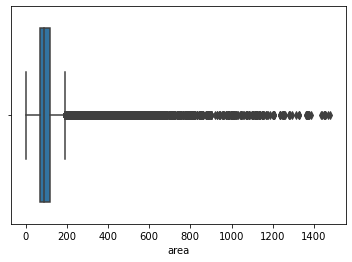

In [6]:
sns.boxplot(df.area) #searching for outliers

In [7]:
Q1 = np.percentile(df["area"], 25)
Q3 = np.percentile(df["area"], 75)
IQR = Q3 - Q1
area_outlier_rows = df[(df["area"] < Q1 - 1.5*IQR) | (df["area"] > Q3 + 1.5*IQR )].index
print("Outliers Rows: " , len(area_outlier_rows))
df.area[(df["area"] < Q1 - 1.5*IQR) | (df["area"] > Q3 + 1.5*IQR )] = np.nan
df.area[df.area<30] = np.nan
df = df.dropna(axis=0, how='any') #cleaning area outliers 
df['area'] = df['area'].astype(int) #converting to int again

Outliers Rows:  56362


<ipython-input-7-3322ce430bfc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area[(df["area"] < Q1 - 1.5*IQR) | (df["area"] > Q3 + 1.5*IQR )] = np.nan
C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-7-3322ce430bfc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area[df.area<30] = np.nan
C:\Users\User\anac

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

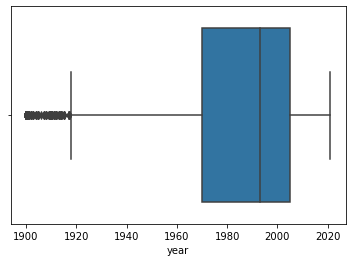

In [8]:
sns.boxplot(df.year) #searching for outliers

In [9]:
Q1 = np.percentile(df["year"], 25)
Q3 = np.percentile(df["year"], 75)
IQR = Q3 - Q1
year_outlier_rows = df[(df["year"] < Q1 - 1.5*IQR) | (df["year"] > Q3 + 1.5*IQR )].index
print("Outliers Rows: " ,len(year_outlier_rows)) #detecting year of built's outliers and their location 
df.year[(df["year"] < Q1 - 1.5*IQR) | (df["year"] > Q3 + 1.5*IQR )] = np.nan
df.year[df.year<1940] = np.nan
df = df.dropna(axis=0, how='any') #cleaning outliers
df['year'] = df['year'].astype(int) #converting to int again
df.year.describe()

Outliers Rows:  47334


<ipython-input-9-4468c7a6eaa0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year[(df["year"] < Q1 - 1.5*IQR) | (df["year"] > Q3 + 1.5*IQR )] = np.nan
C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-9-4468c7a6eaa0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year[df.year<1940] = np.nan
C:\Users\User\an

count   1698480.00000
mean       1989.62533
std          19.71787
min        1940.00000
25%        1971.00000
50%        1994.00000
75%        2006.00000
max        2021.00000
Name: year, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_rooms'>

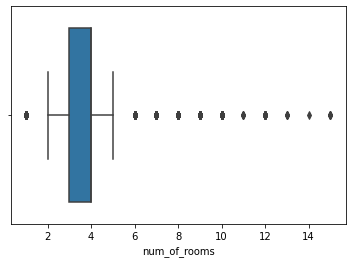

In [10]:
sns.boxplot(df.num_of_rooms) #detecting num of room's outliers

In [11]:
Q1 = np.percentile(df["num_of_rooms"], 25)
Q3 = np.percentile(df["num_of_rooms"], 75)
IQR = Q3 - Q1
num_of_rooms_outlier_rows = df[(df["num_of_rooms"] < Q1 - 3*IQR) | (df["num_of_rooms"] > Q3 + 3*IQR )].index
print("Outliers Rows: ", len(num_of_rooms_outlier_rows))
df.num_of_rooms[(df["num_of_rooms"] < Q1 - 3*IQR) | (df["num_of_rooms"] > Q3 + 3*IQR )] = np.nan
df = df.dropna(axis=0, how='any') #cleaning outliers
df['num_of_rooms'] = df['num_of_rooms'].astype(int) #converting to int again

Outliers Rows:  1131


<ipython-input-11-ffdbf2bcd5de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.num_of_rooms[(df["num_of_rooms"] < Q1 - 3*IQR) | (df["num_of_rooms"] > Q3 + 3*IQR )] = np.nan


In [12]:
Q1 = np.percentile(df["price"], 25)
Q3 = np.percentile(df["price"], 75)
IQR = Q3 - Q1
price_outlier_rows = df[(df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR )].index
print("Outliers Rows: " , len(price_outlier_rows))
df.price[(df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR )] = np.nan
df.price[df.price<300000] = np.nan
df = df.dropna(axis=0, how='any') #cleaning outliers
df['price'] = df['price'].astype(int) #converting to int again

Outliers Rows:  59524


<ipython-input-12-648f5ac2fc11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price[(df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR )] = np.nan


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floor_num'>

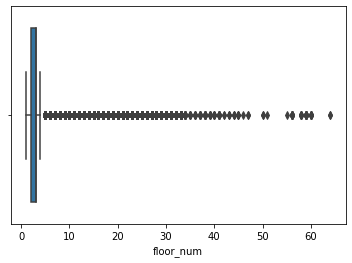

In [13]:
sns.boxplot(df.floor_num)

In [14]:
df.floor_num[df.floor_num>20] = np.nan
df = df.dropna(axis=0, how='any')
df['floor_num'] = df['floor_num'].astype(int)
df.describe()

<ipython-input-14-b00952cf727f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.floor_num[df.floor_num>40] = np.nan


,num_of_rooms,area,floor_num,price,price_square,year
count,1518339.00000,1518339.00000,1518339.00000,1518339.00000,1518339.00000,1518339.00000
mean,3.73634,92.66556,3.22586,972128.37392,10857.48181,1990.54807
std,1.00312,30.55737,2.26541,487723.50890,5254.06885,19.35478
min,1.00000,30.00000,1.00000,300000.00000,1612.00000,1940.00000
25%,3.00000,70.00000,2.00000,577920.00000,7128.00000,1974.00000
50%,4.00000,90.00000,3.00000,864119.00000,9800.00000,1995.00000
75%,4.00000,113.00000,3.00000,1282741.00000,13372.00000,2006.00000
max,7.00000,189.00000,40.00000,2461466.00000,80321.00000,2021.00000


# EDA

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


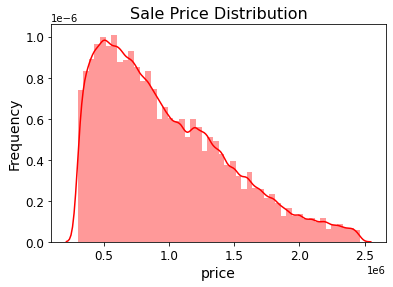

In [15]:
sns.distplot(df['price'], color = 'r') #Sales Distrubtion across all cities (BIG DATA!)
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [16]:
df_temp = df[df['city'] == 'חולון'] #decided to divide the dataset into a smaller one
df_temp

,date,city,num_of_rooms,area,floor_num,price,price_square,year
6,2021-01-27,חולון,4,80,3,1855000,23187,1970
9,2021-01-27,חולון,5,108,11,2095000,19398,1983
10,2021-01-27,חולון,4,80,4,1855000,23187,1970
11,2021-01-27,חולון,3,70,2,1445000,20642,1960
12,2021-01-27,חולון,5,100,3,2400000,24000,2005
...,...,...,...,...,...,...,...,...
271788,1998-04-01,חולון,3,54,1,674120,12483,1994
272009,1998-01-01,חולון,2,59,2,456144,7731,1964
272032,1998-01-01,חולון,2,50,3,636480,12729,1980
272127,1998-01-01,חולון,5,111,6,724880,6530,1991


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

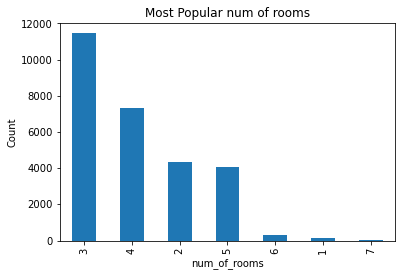

In [17]:
df_temp['num_of_rooms'].value_counts().plot(kind = 'bar') #which num of room is the most popular?
plt.title("Most Popular num of rooms")
plt.xlabel('num_of_rooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price Vs Sqr feet')

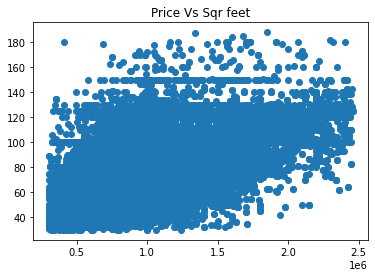

In [18]:
plt.scatter(df_temp.price,df_temp.area)
plt.title("Price Vs Sqr feet")

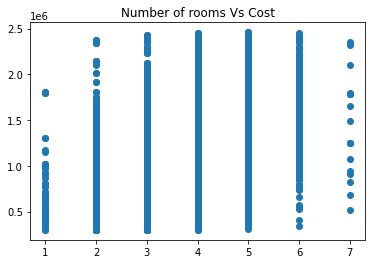

In [19]:
plt.scatter(df_temp.num_of_rooms,df_temp.price)
plt.title("Number of rooms Vs Cost")
plt.show()

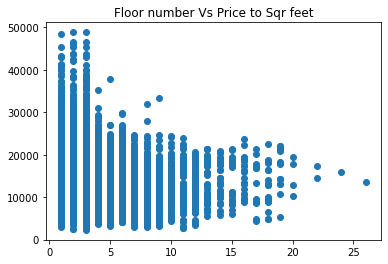

In [20]:
plt.scatter(df_temp.floor_num,df_temp.price_square)
plt.title("Floor number Vs Price to Sqr feet")
plt.show()

# Training a LinearRegression model to predict an house price by most features

In [26]:
reg = LinearRegression()
labels = df_temp['price']
train1 = df_temp.drop(['price','date', 'city'], axis =1)
x_train, x_test, y_train, y_test = train_test_split(train1, labels,test_size = 0.2, random_state=42)
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
c=['num_of_rooms','area','year','price_square','floor_num']
df_test=df_temp[c]
df_test=pd.get_dummies(df_test,columns=['floor_num'],drop_first=True)
y=df_temp['price']
x_train,x_test,y_train,y_test=train_test_split(df_test,y,train_size=0.33,random_state=42)
x_train.head()

,num_of_rooms,area,year,price_square,floor_num_2,floor_num_3,floor_num_4,floor_num_5,floor_num_6,floor_num_7,...,floor_num_14,floor_num_15,floor_num_16,floor_num_17,floor_num_18,floor_num_19,floor_num_20,floor_num_22,floor_num_24,floor_num_26
141542,4,73,1965,15369,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218007,3,55,1970,27272,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176706,3,70,1955,10293,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1341,4,86,2002,18895,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535754,4,100,2014,14800,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


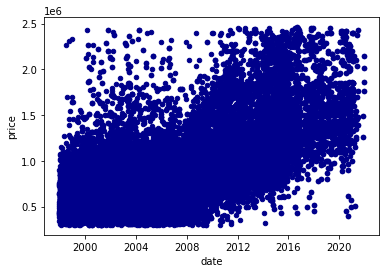

In [23]:
ax1 = df_temp.plot.scatter(x='date',
                      y='price',
                      c='DarkBlue')

In [27]:
y_hat=reg.predict(x_train)

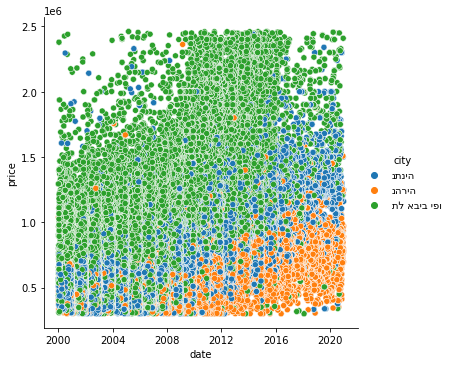

In [47]:
#df_relplot = df[(df['city'] == 'נהריה') | (df['city'] == 'עכו') | (df['city'] == 'באר שבע') | (df['city'] == 'תל אביב יפו')]
df_relplot = df[(df['city'] == 'נהריה') | (df['city'] == 'תל אביב יפו')| (df['city'] == 'נתניה')]
df_relplot = df_relplot[df_relplot['num_of_rooms']== 3]
mask = (df_relplot['date'] > '2000-01-01') & (df_relplot['date'] <= '2020-12-31')
df_relplot = df_relplot.loc[mask]
sns.relplot(data=df_relplot, x="date", y="price", hue="city")

On this graph we can see the price impact on cities that are closer to tel-aviv

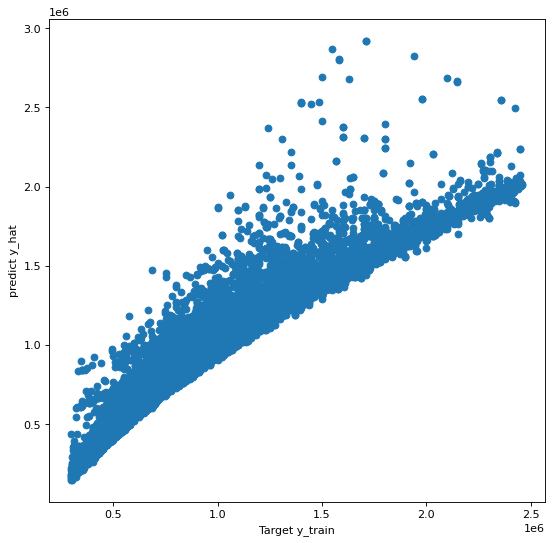

In [34]:
plt.figure(figsize=(8, 8), dpi=80)
#plt.plot(y_train, y_hat, color='blue', linewidth=3)
plt.scatter(y_train,y_hat)
plt.xlabel('Target y_train')
plt.ylabel('predict y_hat')
plt.show()

In [31]:
reg_summary=pd.DataFrame(train1.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,num_of_rooms,9660.71729
1,area,10425.96594
2,floor_num,1859.47525
3,price_square,68.07699
4,year,1873.64904


In [32]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
reg.score(x_test,y_test)

17170881740.676142


0.9144883158394665